Todo: import the packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from sklearn.neural_network import MLPRegressor

In [2]:
# Generate synthetic data for demonstration

np.random.seed(101010)
original_data = np.random.randint(0, 2, 1000)  # Original binary data
time_series = np.linspace(0, 1, 1000)
measurement = original_data + np.random.normal(0, 0.2, 1000)  # Noisy measurement

## Display the synthetic data

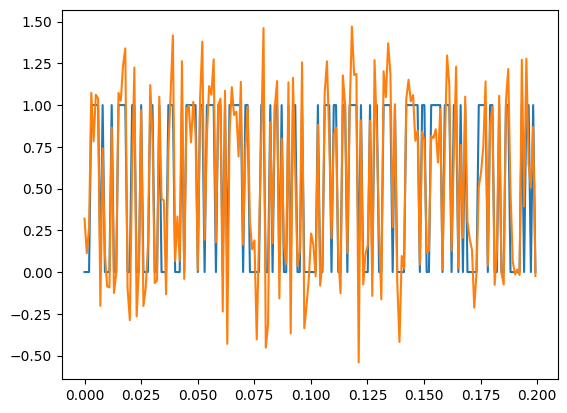

In [3]:
idx = 200
plt.plot(time_series[:idx], original_data[:idx],
         time_series[:idx], measurement[:idx],        
        )

## Filter the data

Define a butter low pass filter and then apply it to our data.

In [4]:
# Butterworth low-pass filter to reduce noise

def butter_lowpass_filter(data, cutoff, fs, order=5):
    
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)

    return y

In [5]:
# Apply low-pass filter
filtered_measurement = butter_lowpass_filter(measurement, cutoff=0.1, fs=1.0)

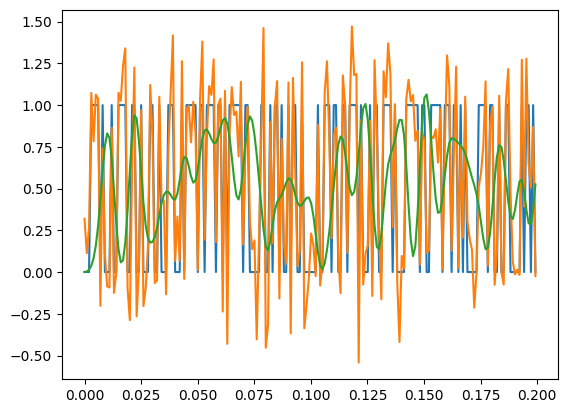

In [6]:
# plot the filtered data

idx = 200
plt.plot(time_series[:idx], original_data[:idx],
         time_series[:idx], measurement[:idx],        
         time_series[:idx], filtered_measurement[:idx])

Question: Filtering does not look too promising. Perhaps we continue with the original data?


## Neural Network

In [15]:
# Prepare data for neural network

# X = filtered_measurement.reshape(-1, 1)
X = measurement.reshape(-1, 1)
y = original_data

In [16]:
# Train neural network

nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn.fit(X, y)

MLPRegressor(max_iter=1000, random_state=42)

In [17]:
# Predict and reconstruct binary data

reconstructed_data = nn.predict(X)
reconstructed_binary_data = np.round(reconstructed_data).astype(int)

Text(0.5, 1.0, 'Reconstructed Data vs. Original Data')

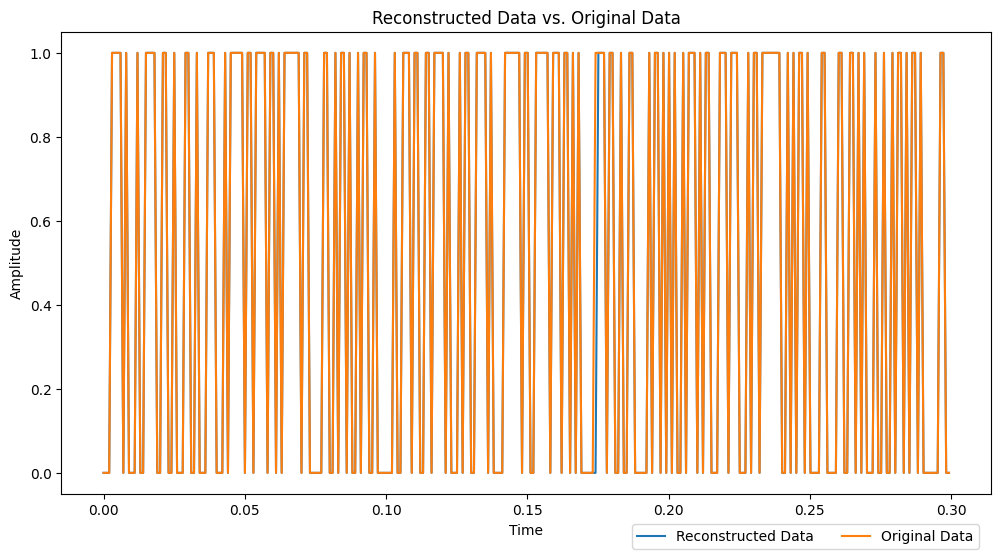

In [18]:
idx = 300

plt.figure(figsize=(12, 6))
plt.plot(time_series[:idx], reconstructed_binary_data[:idx], label='Reconstructed Data')
plt.plot(time_series[:idx], original_data[:idx], label='Original Data')

# place the legend below the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.8, -0.05), ncol=2)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Reconstructed Data vs. Original Data')

Text(0.5, 1.0, 'Reconstructed Data vs. Original Data')

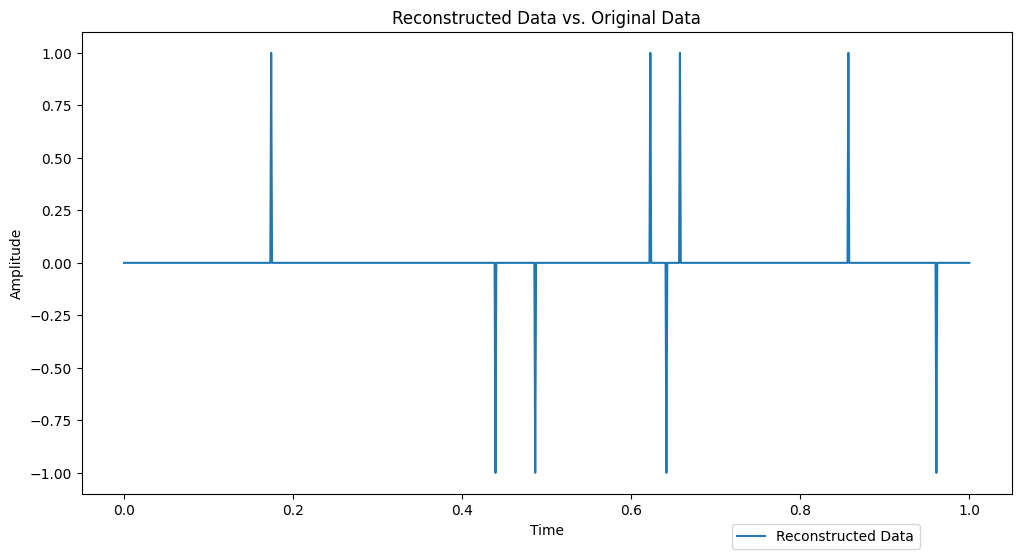

In [19]:
idx = 1000

plt.figure(figsize=(12, 6))
plt.plot(time_series[:idx], original_data[:idx] - reconstructed_binary_data[:idx], label='Reconstructed Data')
# plt.plot(time_series[:idx], original_data[:idx], label='Original Data')

# place the legend below the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.8, -0.05), ncol=2)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Reconstructed Data vs. Original Data')

In [20]:
error = np.abs(original_data - reconstructed_binary_data).sum()

In [21]:
print(f'number of errors: {error}')
print(f'error rate: {error / len(original_data)}')

number of errors: 8
error rate: 0.008
